In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import random

In [51]:
centers = 4
samples = 1000
X, _ = make_blobs(n_samples=samples, centers=centers, n_features=2, cluster_std=0.2, random_state=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
obj_names = []
for i in range(1,samples+1):
    obj = "Object " + str(i)
    obj_names.append(obj)

In [53]:

data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:,0],
    'Y_value': X[:,-1]
})
print(data.head())

     Object   X_value   Y_value
0  Object 1 -1.033719  1.516607
1  Object 2  0.541391  0.090680
2  Object 3 -1.091108  1.571734
3  Object 4 -1.233579 -0.504013
4  Object 5  1.363090 -1.182200


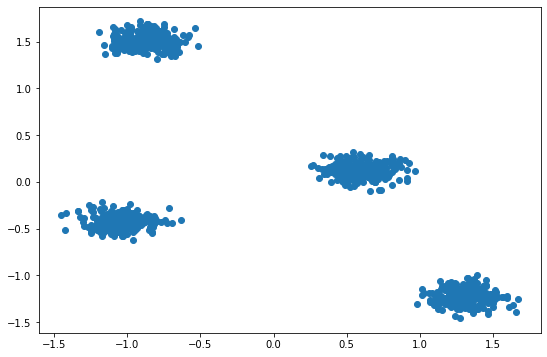

In [54]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:,0],X[:,-1])
plt.show()

In [55]:
def initCentroids(k, X):
    minY = (X[:,-1].min())
    minX = (X[:,0].min())
    maxY = (X[:,-1].max())
    maxX = (X[:,0].max())
    centroids = np.zeros((k,2))
    for i in range(k):
        x = random.uniform(minX, maxX)
        y = random.uniform(minY, maxY)
        centroids[i] = [x,y]
    return centroids

In [56]:
def calcDistance(centroid, X, Y):
    distances = []
    
    c_x = centroid[0]
    c_y = centroid[1]
    
    for x,y in list(zip(X,Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [57]:
best = [[-1],[]]
for k in range(centers, centers*3):
    centroids = initCentroids(k,X)
    #print(centroids)
    
    for _ in range(10):
        for i in range(k):
            data['C' + str(i) + '_Distance'] = calcDistance(centroids[i], data.X_value, data.Y_value)
    
        data['Cluster'] = data[['C' + str(i) + '_Distance' for i in range(k)]].apply(np.argmin, axis=1)

        for i in range(k):
            x_new = data[data['Cluster'] == i]['X_value'].mean()
            y_new = data[data['Cluster'] == i]['Y_value'].mean()
            centroids[i] = [x_new,y_new]
    
    silscore = silhouette_score(X, data['Cluster'])
    if best[0] < silscore:
        best[0] = silscore
        best[1] = centroids
        print("Current best: " + str(silscore) + "(" + str(k) + ")")
        

Current best: 0.7409527625408002(4)
Current best: 0.8877584549949902(5)


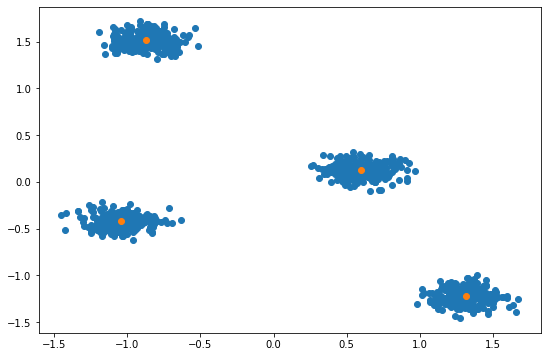

In [58]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:,0],X[:,-1])
plt.scatter(best[1][:,0],best[1][:,-1])
plt.show()